In [1]:
#그래프 만들기

In [3]:
#산점도 : sns.scatterplot()

In [4]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

<Axes: xlabel='displ', ylabel='hwy'>

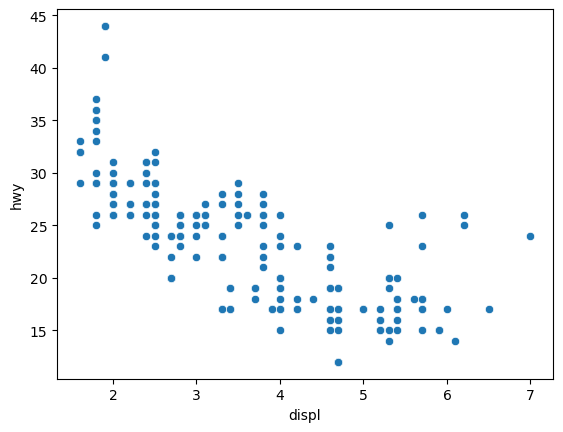

In [6]:
import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

In [7]:
# 종류별로 색깔 다르게 하기

In [8]:
#hue = ''

<Axes: xlabel='displ', ylabel='hwy'>

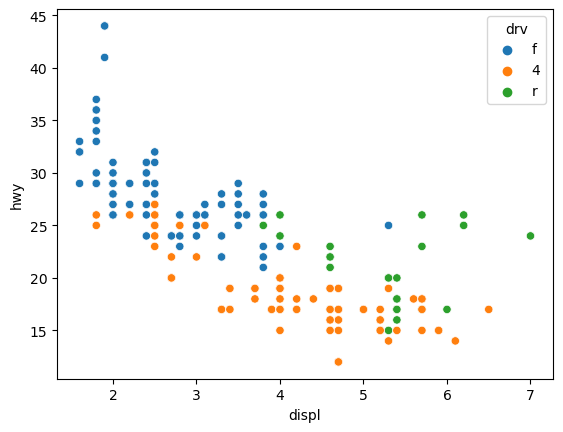

In [10]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv') # 'drv'에 따른 색깔 설정

In [11]:
# 막대 그래프

In [ ]:
#sns.barplot()

In [14]:
df_mpg = mpg.groupby('drv') \
            .agg(mean_hwy = ('hwy', 'mean'))
df_mpg #drv가 인덱스로 들어간 경우, 그래프로 만들지 못함. 그래서 as_index를 사용해 변수로 변경해줘야함

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [15]:
df_mpg = mpg.groupby('drv', as_index = False) \
            .agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<Axes: xlabel='drv', ylabel='mean_hwy'>

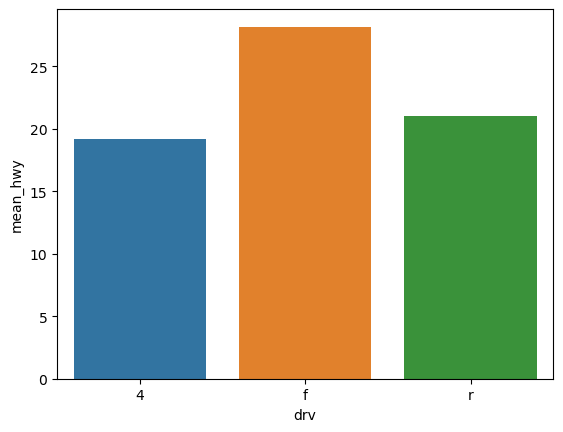

In [17]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

In [18]:
#크기순으로 정렬

In [19]:
#df.sort_values()

<Axes: xlabel='drv', ylabel='mean_hwy'>

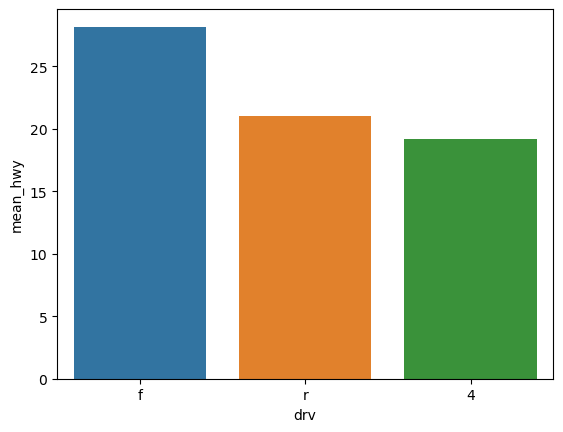

In [20]:
df_mpg = df_mpg.sort_values('mean_hwy', ascending = False)
sns.barplot(df_mpg, x = 'drv', y = 'mean_hwy')

In [21]:
# 빈도막대 그래프 만들기

In [22]:
#sns.countplot()

In [24]:
df_mpg = mpg.groupby('drv', as_index = False) \
            .agg(n = ('drv', 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


<Axes: xlabel='drv', ylabel='count'>

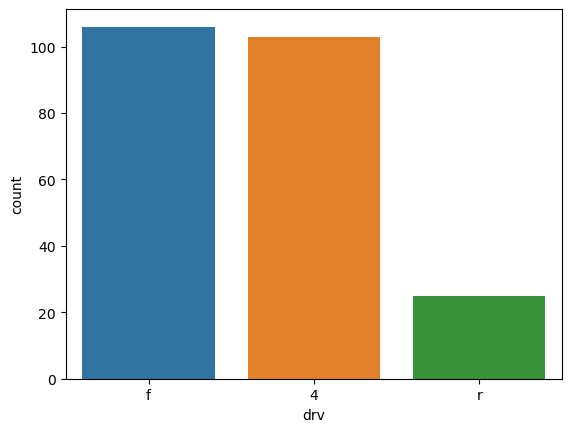

In [26]:
sns.countplot(mpg, x = 'drv')

In [27]:
#실습(p211)

In [57]:
df_mpg = mpg.query('category == "suv"') \
            .groupby('manufacturer', as_index = False).agg(mean_cty = ('cty', 'mean')) \
            .sort_values('mean_cty', ascending = False).head()
df_mpg

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


<Axes: xlabel='manufacturer', ylabel='mean_cty'>

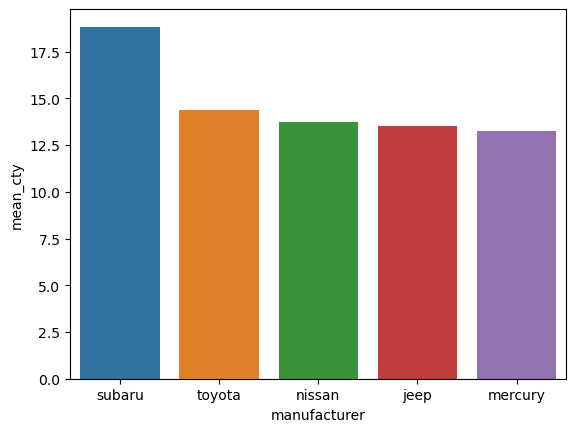

In [58]:
sns.barplot(df_mpg, x = 'manufacturer', y = 'mean_cty')

In [65]:
df_mpg = mpg.groupby('category', as_index = False) \
            .agg(n = ('category', 'count')) \
            .sort_values('n', ascending = False)
df_mpg

,category,n
6,suv,62
1,compact,47
2,midsize,41
5,subcompact,35
4,pickup,33
3,minivan,11
0,2seater,5


<Axes: xlabel='category', ylabel='n'>

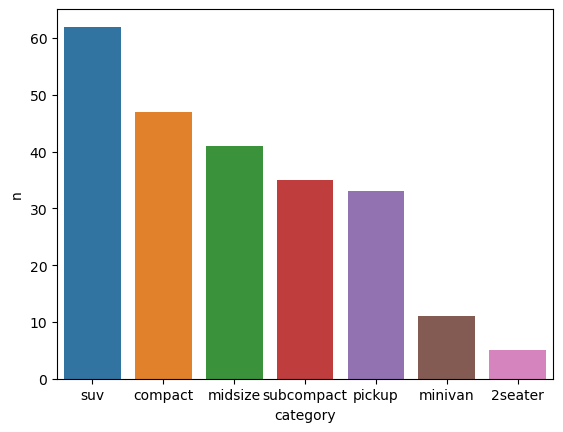

In [66]:
sns.barplot(df_mpg, x = 'category', y = 'n')

In [1]:
#선그래프

In [3]:
#sns.lineplot()

In [7]:
import pandas as pd
eco = pd.read_csv('economics.csv')
eco.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<Axes: xlabel='date', ylabel='unemploy'>

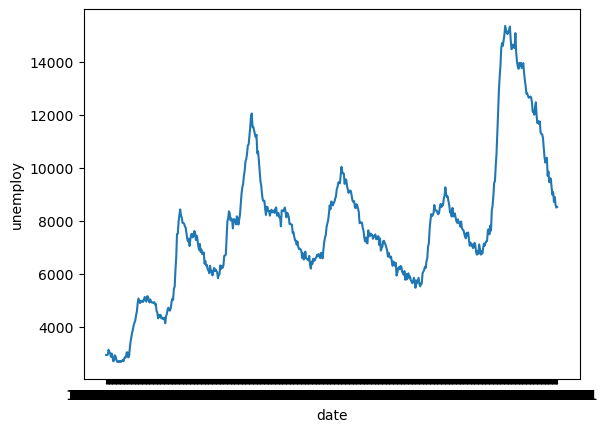

In [9]:
import seaborn as sns
sns.lineplot(eco, x = 'date', y = 'unemploy')

In [11]:
eco.info() # x축에 date를 나오게 하려면 '날짜 시간'타입으로 바꿔야함. 현재는 object 타입인걸 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [12]:
#'날짜 시간'타입으로 변경 : pd.to_datetime()

In [14]:
eco['date2'] = pd.to_datetime(eco['date'])
eco.head()

,date,pce,pop,psavert,uempmed,unemploy,date2
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01


In [16]:
#변수가 '날짜 시간'타입이면 .dt.를 통해 년,월,일을 추출할 수 있음

In [18]:
eco['date2'].dt.year.head()

0    1967
1    1967
2    1967
3    1967
4    1967
Name: date2, dtype: int64

In [19]:
eco['date2'].dt.month.head()

0     7
1     8
2     9
3    10
4    11
Name: date2, dtype: int64

In [20]:
eco['date2'].dt.day.head()

0    1
1    1
2    1
3    1
4    1
Name: date2, dtype: int64

In [23]:
eco['year'] = eco['date2'].dt.year
eco

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.000,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.000,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.000,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.000,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.000,12.8,4.7,3066,1967-11-01,1967
...,...,...,...,...,...,...,...,...
569,2014-12-01,12062.0,319746.157,7.6,12.9,8717,2014-12-01,2014
570,2015-01-01,12046.0,319928.646,7.7,13.2,8903,2015-01-01,2015
571,2015-02-01,12082.4,320074.511,7.9,12.9,8610,2015-02-01,2015
572,2015-03-01,12158.3,320230.786,7.4,12.0,8504,2015-03-01,2015


<Axes: xlabel='year', ylabel='unemploy'>

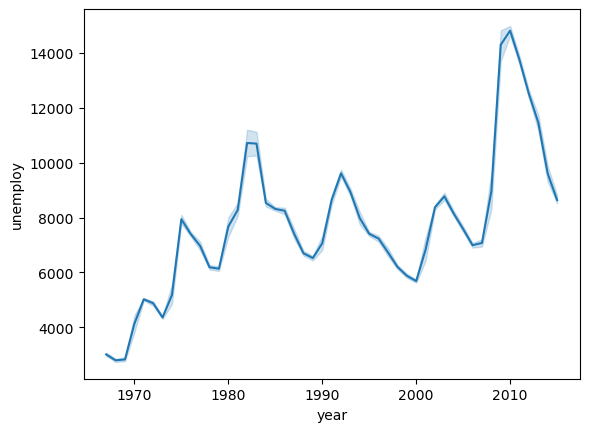

In [25]:
sns.lineplot(eco, x = 'year', y = 'unemploy') #표시된 면적은 신뢰구간을 뜻함

In [29]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
 7   year      574 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 36.0+ KB


In [41]:
#실습(p.217)

<Axes: xlabel='year', ylabel='psavert'>

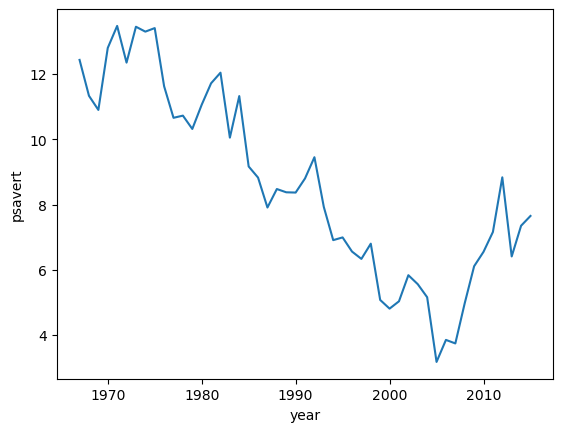

In [42]:
sns.lineplot(eco, x = 'year', y = 'psavert', errorbar = None)

In [43]:
eco['month'] = eco['date2'].dt.month
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
 7   year      574 non-null    int64         
 8   month     574 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 40.5+ KB


<Axes: xlabel='month', ylabel='psavert'>

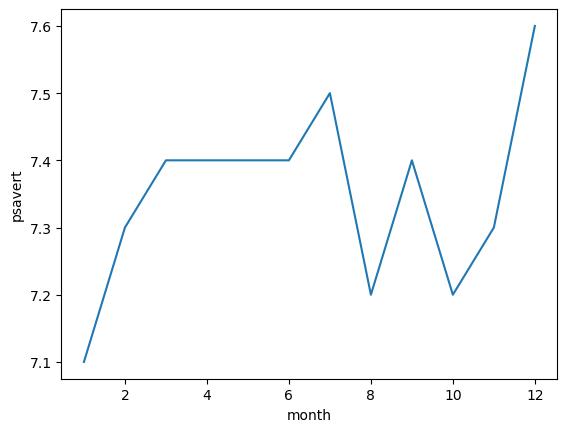

In [40]:
df_year = eco.query('year == 2014')
sns.lineplot(df_year, x = 'month', y = 'psavert', errorbar = None)